# ENCS5341 : MACHINE LEARNING AND DATA SCIENCE
<h4>Assignment 3: <br> KNN, Logistic Regression, SVM, Kernel Methods, and Ensemble Methods (Boosting and Bagging) </h4>

<h4> <b>Mohammed Abed Alkareem - 1210708</b> </h4>

https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html


The breast cancer dataset is a classic and binary classification dataset.

<div class="pst-scrollable-table-container"><table class="table">
<tbody>
<tr class="row-odd"><td><p>Classes</p></td>
<td><p>2</p></td>
</tr>
<tr class="row-even"><td><p>Samples per class</p></td>
<td><p>212(M),357(B)</p></td>
</tr>
<tr class="row-odd"><td><p>Samples total</p></td>
<td><p>569</p></td>
</tr>
<tr class="row-even"><td><p>Dimensionality</p></td>
<td><p>30</p></td>
</tr>
<tr class="row-odd"><td><p>Features</p></td>
<td><p>real, positive</p></td>
</tr>
</tbody>
</table>
</div>

In [82]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## 1. Data Preprocessing

In [27]:
cancer_data = load_breast_cancer(as_frame=True)

cancer_features = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_labels = pd.Series(cancer_data.target)

In [28]:
cancer_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
cancer_labels

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(cancer_features, cancer_labels, test_size=0.25, random_state=42)

## 2. Classification Models

### 2.1 K-Nearest Neighbors (KNN)

In [74]:

distances = ['euclidean', 'manhattan', 'cosine', 'minkowski']
param_grid = {'metric': distances}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine',
                                    'minkowski']},
             scoring='accuracy')

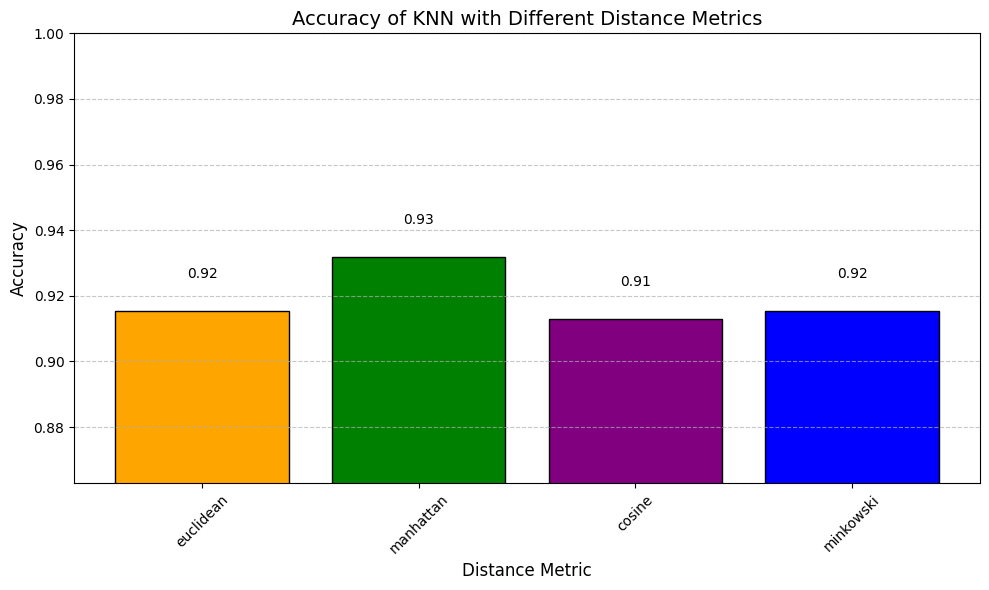

In [75]:
accuracies = grid_search.cv_results_['mean_test_score']

min_accuracy = min(accuracies)
max_accuracy = max(accuracies)

colors = ['orange', 'green', 'purple', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(distances, accuracies, color=colors, edgecolor='black')
plt.ylim(min_accuracy - 0.05, 1)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Distance Metric', fontsize=12)
plt.title('Accuracy of KNN with Different Distance Metrics', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{bar.get_height():.2f}', ha='center', fontsize=10)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [76]:

K_values = [1, 3, 5, 7, 9, 15]


param_grid = {'n_neighbors': K_values}
knn = KNeighborsClassifier(metric='manhattan')
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='manhattan'),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 15]},
             scoring='accuracy')

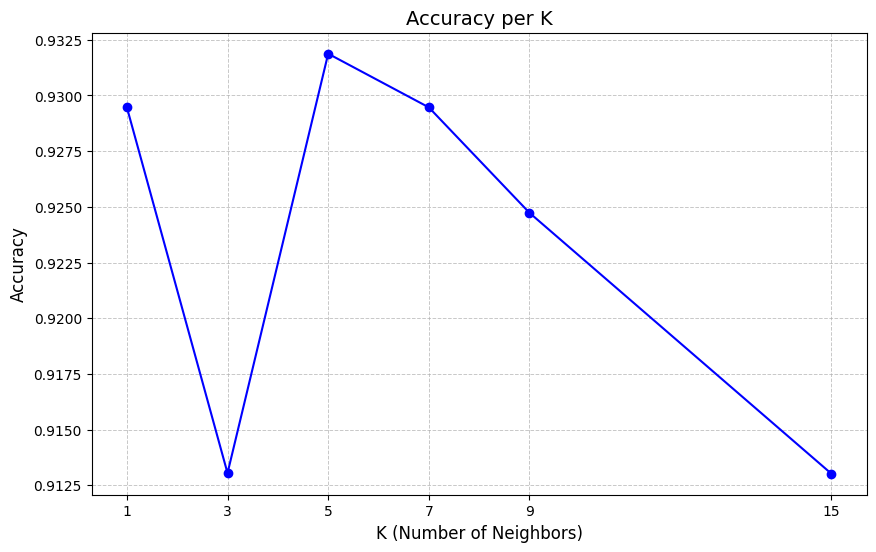

In [77]:

# Plot the line
plt.figure(figsize=(10, 6))
plt.plot(K_values, grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='blue', label='Mean Test Accuracy')  # Added markers and label
plt.xlabel('K (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy per K', fontsize=14)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)  # Improved gridlines
plt.xticks(K_values, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [78]:
distances = ['euclidean', 'manhattan', 'cosine', 'minkowski']
K_values = [1, 3, 5, 7, 9, 15]
param_grid = {'metric': distances, 'n_neighbors': K_values}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine',
                                    'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 15]},
             scoring='accuracy')

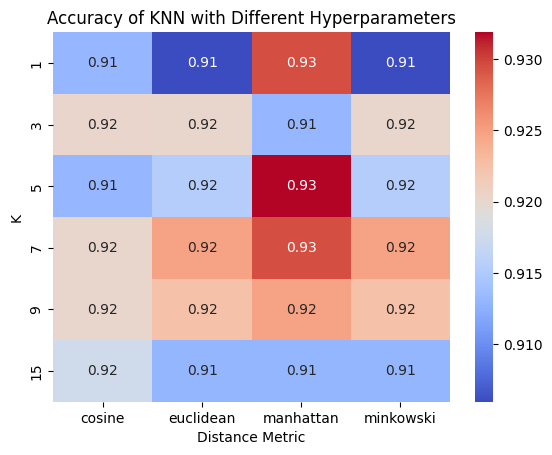

In [79]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.pivot(index='param_n_neighbors', columns='param_metric', values='mean_test_score')
sns.heatmap(results, annot=True, cmap='coolwarm')
plt.xlabel('Distance Metric')
plt.ylabel('K')
plt.title('Accuracy of KNN with Different Hyperparameters')
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.95      0.98      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



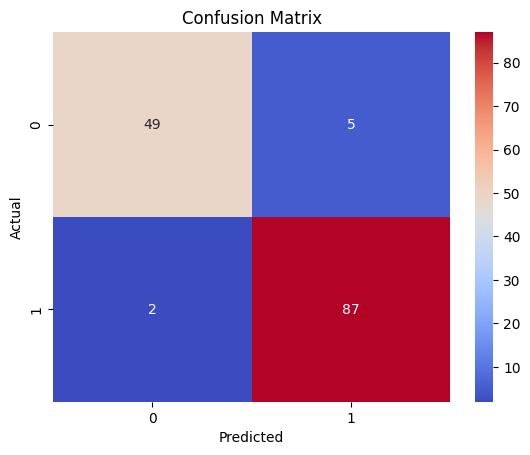

In [80]:
#train with the best parameters
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)

# test on the test set
y_pred = knn.predict(X_test)

#get full report
print(classification_report(y_test, y_pred))
# confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

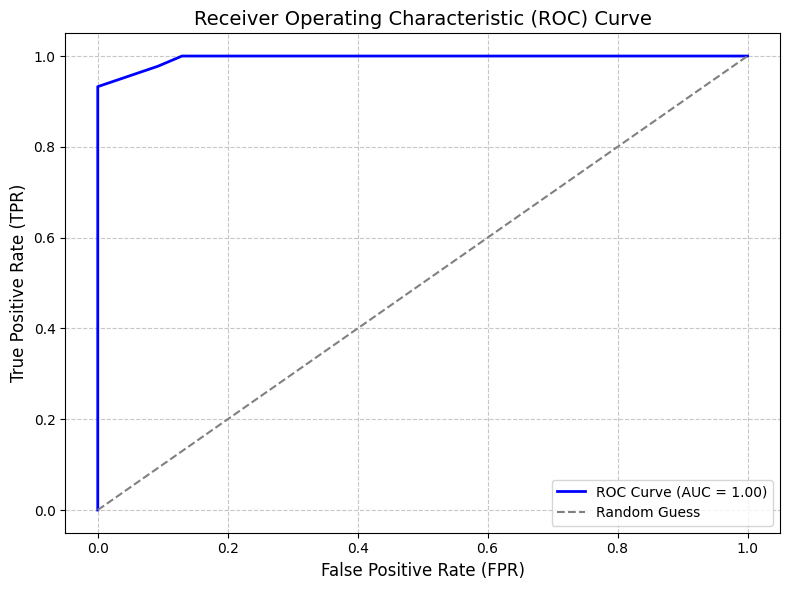

In [83]:
# Generate ROC Curve (if binary classification)
if len(set(y_test)) == 2:  # Ensure it's binary classification
    y_probs = knn.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### 2.2 Logistic Regression

### 2.3 Support Vector Machine (SVM)

### 2.4 Ensemble Methods (Boosting and Bagging)